In [2]:
!pip install opencv-python scikit-image


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import cv2
import numpy as np

# Load the two images
image1 = cv2.imread('0.jpg')
image2 = cv2.imread('1.jpg')

# Ensure both images are the same size
if image1.shape != image2.shape:
    print("Error: Images must have the same dimensions.")
else:
    # Compute the absolute difference between the two images
    output_image = cv2.absdiff(image1, image2)
    print(output_image)

    # Display the output image
    cv2.imshow("Absolute Difference", output_image)

    # Wait until a key is pressed and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


[[[ 15  66 189]
  [ 15  66 189]
  [ 16  67 190]
  ...
  [ 47  54  32]
  [ 46  53  33]
  [ 44  53  33]]

 [[ 15  66 189]
  [ 15  66 189]
  [ 16  67 190]
  ...
  [ 47  54  32]
  [ 46  53  33]
  [ 43  52  34]]

 [[ 15  65 191]
  [ 15  65 191]
  [ 16  66 192]
  ...
  [ 46  53  33]
  [ 43  52  34]
  [ 43  52  34]]

 ...

 [[ 31  79 142]
  [ 31  79 142]
  [ 31  79 142]
  ...
  [ 97  58   6]
  [ 97  58   6]
  [ 97  58   6]]

 [[ 30  83 145]
  [ 30  83 145]
  [ 30  83 145]
  ...
  [ 94  56   2]
  [ 94  56   2]
  [ 94  56   2]]

 [[ 29  84 146]
  [ 29  84 146]
  [ 29  84 146]
  ...
  [ 92  54   0]
  [ 92  54   0]
  [ 92  54   0]]]


Set 1 Question 2

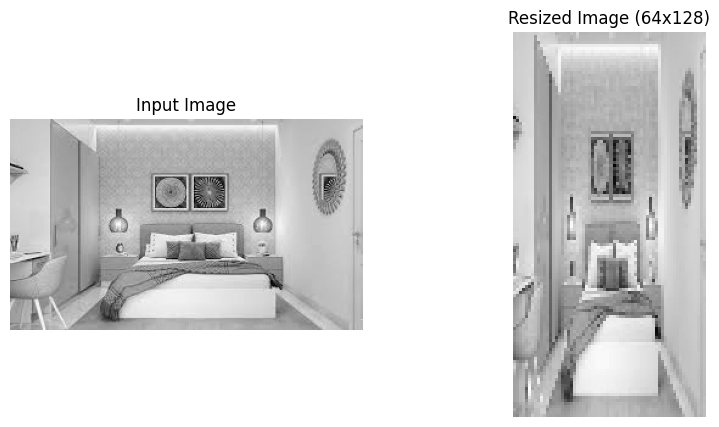

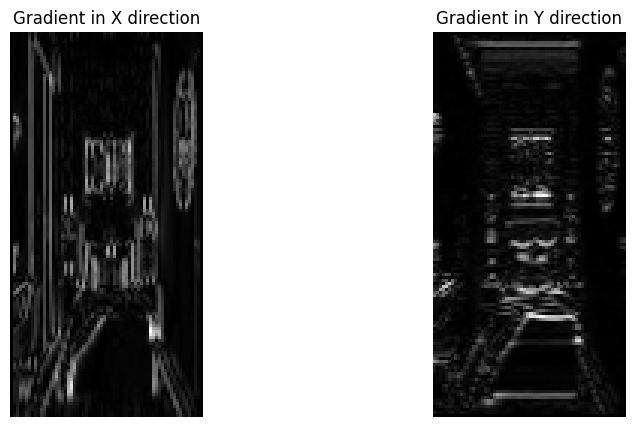

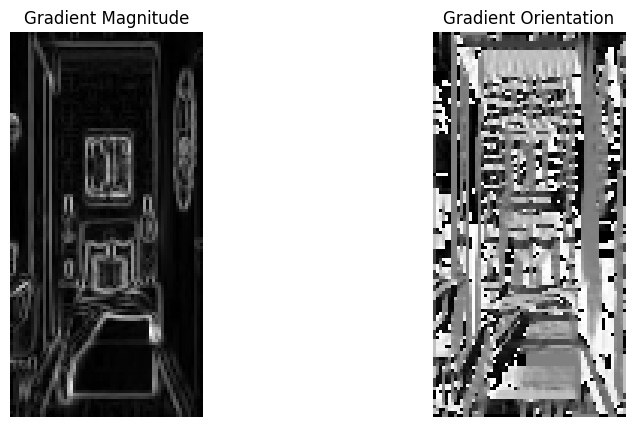

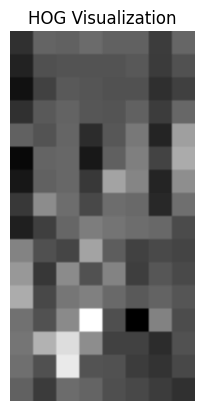

HOG feature vector size: (3780,)


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load and preprocess the image
image = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Could not load the image.")
else:
    # Resize the image to 64x128
    image_resized = cv2.resize(image, (64, 128))
    
    # Display the original and resized image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_resized, cmap='gray')
    plt.title('Resized Image (64x128)')
    plt.axis('off')
    plt.show()

# Calculate gradients along x and y directions
grad_x = cv2.Sobel(image_resized, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image_resized, cv2.CV_64F, 0, 1, ksize=3)

# Display gradients
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(grad_x), cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(grad_y), cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')
plt.show()

# Calculate the magnitude and orientation of gradients
magnitude = cv2.magnitude(grad_x, grad_y)
orientation = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# Display magnitude and orientation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(orientation, cmap='gray')
plt.title('Gradient Orientation')
plt.axis('off')
plt.show()

# Initialize parameters for HOG
cell_size = 8  # 8x8 pixels per cell
bin_size = 9   # 9 orientation bins
block_size = 2  # 2x2 cells per block

# Calculate HOG
def calculate_histogram_of_gradients(magnitude, orientation, cell_size, bin_size):
    num_cells_x = magnitude.shape[1] // cell_size
    num_cells_y = magnitude.shape[0] // cell_size
    histograms = np.zeros((num_cells_y, num_cells_x, bin_size))
    bin_edges = np.linspace(0, 180, bin_size + 1)
    
    for i in range(num_cells_y):
        for j in range(num_cells_x):
            cell_mag = magnitude[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            cell_orient = orientation[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            hist, _ = np.histogram(cell_orient, bins=bin_edges, weights=cell_mag)
            histograms[i, j, :] = hist
    
    return histograms

# Normalize histograms
def normalize_histograms(histograms, block_size):
    num_blocks_y = histograms.shape[0] - block_size + 1
    num_blocks_x = histograms.shape[1] - block_size + 1
    normalized_features = []
    
    for y in range(num_blocks_y):
        for x in range(num_blocks_x):
            block = histograms[y:y+block_size, x:x+block_size, :].ravel()
            block_norm = np.linalg.norm(block) + 1e-5  # Avoid division by zero
            normalized_features.append(block / block_norm)
    
    return np.concatenate(normalized_features)

# Calculate HOG histograms and normalize
histograms = calculate_histogram_of_gradients(magnitude, orientation, cell_size, bin_size)
hog_features = normalize_histograms(histograms, block_size)

# Reshape the HOG image for visualization
hog_image = np.zeros_like(image_resized, dtype=np.float32)
for i in range(histograms.shape[0]):
    for j in range(histograms.shape[1]):
        cell_hist = histograms[i, j]
        angle = np.linspace(0, 180, bin_size, endpoint=False)
        for k in range(bin_size):
            hog_image[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size] += cell_hist[k] * np.cos(np.deg2rad(angle[k]))

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
plt.show()

# Print feature vector length
print(f"HOG feature vector size: {hog_features.shape}")
